# Recommendation systems

based on: > F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. <https://doi.org/10.1145/2827872>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
url_1 = 'https://drive.google.com/file/d/1Siw46DrIlDBbAsuQ9IyG3X4DvjpdQgVM/view?usp=sharing' 
path_1 = 'https://drive.google.com/uc?export=download&id='+url_1.split('/')[-2]
movies = pd.read_csv(path_1)

url_2 = 'https://drive.google.com/file/d/1wyXZAsvDgcj2GzBy2ddhEGCvsKSv6h7L/view?usp=sharing' 
path_2 = 'https://drive.google.com/uc?export=download&id='+url_2.split('/')[-2]
ratings = pd.read_csv(path_2)

In [45]:
data_1 = r"C:\Users\danie\Desktop\WBS.DataScience_Bootcamp\Week_11_recommender_systems\ml-latest-small\ratings.csv"
ratings = pd.read_csv(data_1)

data_2 = r"C:\Users\danie\Desktop\WBS.DataScience_Bootcamp\Week_11_recommender_systems\ml-latest-small\movies.csv"
movies = pd.read_csv(data_2)

data_3 = r"C:\Users\danie\Desktop\WBS.DataScience_Bootcamp\Week_11_recommender_systems\ml-latest-small\tags.csv"
tags = pd.read_csv(data_3)

data_4 = r"C:\Users\danie\Desktop\WBS.DataScience_Bootcamp\Week_11_recommender_systems\ml-latest-small\links.csv"
links = pd.read_csv(data_4)

# Overall quality based recommendations
grouping user-ratings from ratings-DF by movieID and merging with movies in order to have titles in same DF

In [46]:
movie_ratings = ratings.groupby("movieId").agg({"rating": "mean", "userId": "count"})
movie_ratings = pd.merge(movie_ratings, movies, on="movieId").set_index("movieId")

setting up 0.1 percentiles for average rating and overall reviews

In [48]:
movie_ratings_by_rating = movie_ratings.sort_values("rating", ascending=False)
movie_ratings_by_rating.reset_index(inplace=True)

In [49]:
movie_ratings_by_rating["rat_quantile"] = np.where(
    movie_ratings_by_rating.index < len(movie_ratings_by_rating) * 0.1, 0,
    np.where(movie_ratings_by_rating.index <= len(movie_ratings_by_rating) * 0.2, 1,
    np.where(movie_ratings_by_rating.index <= len(movie_ratings_by_rating) * 0.3, 2,
    np.where(movie_ratings_by_rating.index <= len(movie_ratings_by_rating) * 0.4, 3,
    np.where(movie_ratings_by_rating.index <= len(movie_ratings_by_rating) * 0.5, 4,
    np.where(movie_ratings_by_rating.index <= len(movie_ratings_by_rating) * 0.6, 5,
    np.where(movie_ratings_by_rating.index <= len(movie_ratings_by_rating) * 0.7, 6,
    np.where(movie_ratings_by_rating.index <= len(movie_ratings_by_rating) * 0.8, 7,         
    np.where(movie_ratings_by_rating.index <= len(movie_ratings_by_rating) * 0.9, 8, 9
             ))))))))
)

In [50]:
movie_ratings_by_popularity = movie_ratings.sort_values("userId", ascending=False)
movie_ratings_by_popularity.reset_index(inplace=True)

In [51]:
movie_ratings_by_popularity["pop_quantile"] = np.where(
    movie_ratings_by_popularity.index < len(movie_ratings_by_popularity) * 0.1, 0,
    np.where(movie_ratings_by_popularity.index <= len(movie_ratings_by_popularity) * 0.2, 1,
    np.where(movie_ratings_by_popularity.index <= len(movie_ratings_by_popularity) * 0.3, 2,
    np.where(movie_ratings_by_popularity.index <= len(movie_ratings_by_popularity) * 0.4, 3,
    np.where(movie_ratings_by_popularity.index <= len(movie_ratings_by_popularity) * 0.5, 4,
    np.where(movie_ratings_by_popularity.index <= len(movie_ratings_by_popularity) * 0.6, 5,
    np.where(movie_ratings_by_popularity.index <= len(movie_ratings_by_popularity) * 0.7, 6,
    np.where(movie_ratings_by_popularity.index <= len(movie_ratings_by_popularity) * 0.8, 7,         
    np.where(movie_ratings_by_popularity.index <= len(movie_ratings_by_popularity) * 0.9, 8, 9
             ))))))))
)

In [53]:
movie_ratings_by_popularity.head()

,movieId,rating,userId,title,genres,pop_quantile
0,356,4.164134,329,Forrest Gump (1994),Comedy|Drama|Romance|War,0
1,318,4.429022,317,"Shawshank Redemption, The (1994)",Crime|Drama,0
2,296,4.197068,307,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,0
3,593,4.161290,279,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,0
4,2571,4.192446,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller,0


In [58]:
movie_ratings = movie_ratings.merge(movie_ratings_by_rating[["rat_quantile", "movieId"]], on="movieId")

In [59]:
movie_ratings = movie_ratings.merge(movie_ratings_by_popularity[["pop_quantile", "movieId"]], on="movieId")

only using movies that are both in top 0.1 percentile by popularity and rating for the recommendation

In [61]:
movie_ratings[(movie_ratings.rat_quantile == 0) & (movie_ratings.pop_quantile == 0)].sort_values("rating", ascending=False).head()

,movieId,rating,userId,title,genres,rat_quantile,pop_quantile
277,318,4.429022,317,"Shawshank Redemption, The (1994)",Crime|Drama,0,0
704,922,4.333333,27,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance,0,0
680,898,4.310345,29,"Philadelphia Story, The (1940)",Comedy|Drama|Romance,0,0
905,1204,4.300000,45,Lawrence of Arabia (1962),Adventure|Drama|War,0,0
210,246,4.293103,29,Hoop Dreams (1994),Documentary,0,0


In [64]:
movie_ratings[(movie_ratings.rat_quantile == 0) & (movie_ratings.pop_quantile == 0)].sort_values("rating", ascending=False).head()

,movieId,rating,userId,title,genres,rat_quantile,pop_quantile
277,318,4.429022,317,"Shawshank Redemption, The (1994)",Crime|Drama,0,0
704,922,4.333333,27,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance,0,0
680,898,4.310345,29,"Philadelphia Story, The (1940)",Comedy|Drama|Romance,0,0
905,1204,4.300000,45,Lawrence of Arabia (1962),Adventure|Drama|War,0,0
210,246,4.293103,29,Hoop Dreams (1994),Documentary,0,0


In [68]:
def quality_recommendation(n):
    recommended_df = movie_ratings[(movie_ratings.rat_quantile == 0) & (movie_ratings.pop_quantile == 0)].sort_values("rating", ascending=False).head(n)
    return recommended_df[["title", "genres"]]

# in production this would exclude those movies already watched by the user (.isin([watchlist])=False)

# Item-based collaborative filtering
since not all movies are rated and that gave errors (non matching lenght of movie DF compared to the number of colums in crosstable ratings, raising issues for last movies in list when using cos) i remove the unrated movies from the working df
recommendation-code takes given movieId as input, in production probably the movie last watched by user

In [62]:
movie_df = movies[movies.movieId.isin(list(ratings.movieId))].reset_index()
movie_df = movie_df.iloc[:,1:]


correlation (PearsonR as metric)

In [70]:
# including NA

def you_may_also_like_this_movie(movieId, n):
    ratings_crosstab = pd.pivot_table(data=ratings, values="rating", index="userId", columns="movieId")
    ID = movieId
    compare = ratings_crosstab[ID]
    similar = ratings_crosstab.corrwith(compare)
    similar_df = pd.DataFrame(similar, columns=["score"]).drop(index=ID, axis=0)
    similar_titles = similar_df.merge(movies, on="movieId")
    recommended = similar_titles.sort_values("score", ascending=False).head(n)
    return recommended[["title", "score"]]

In [71]:
you_may_also_like_this_movie(922, 7)

c:\Users\danie\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\danie\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,title,score
2620,Ready to Rumble (2000),1.0
2836,Pokémon the Movie 2000 (2000),1.0
2996,Pollock (2000),1.0
2974,102 Dalmatians (2000),1.0
2973,Rugrats in Paris: The Movie (2000),1.0
2966,You Can Count on Me (2000),1.0
2943,"Contender, The (2000)",1.0


In [74]:
# replacing na with 0
def you_may_also_like_this_movie_2(movieId, n):
    ratings_crosstab = pd.pivot_table(data=ratings, values="rating", index="userId", columns="movieId")
    ratings_crosstab.fillna(0, inplace=True)
    ID = movieId
    compare = ratings_crosstab[ID]
    similar = ratings_crosstab.corrwith(compare)
    similar_df = pd.DataFrame(similar, columns=["score"]).drop(index=ID, axis=0)
    similar_titles = similar_df.merge(movies, on="movieId")
    recommended = similar_titles.sort_values("score", ascending=False).head(n)
    return recommended[["title", "score"]]

In [75]:
you_may_also_like_this_movie_2(922, 7)

,title,score
2614,Network (1976),0.478832
708,Rebecca (1940),0.451188
734,Bringing Up Baby (1938),0.426253
949,Chinatown (1974),0.420603
695,"Maltese Falcon, The (1941)",0.414294
730,His Girl Friday (1940),0.412901
981,"Big Sleep, The (1946)",0.395728


## using cosine as similarity metric instead of PearsonR

In [76]:
def you_may_also_like_this(movieId, n):
    ratings_crosstab = pd.pivot_table(data=ratings, values="rating", index="userId", columns="movieId") # setting up user-item-matrix
    ratings_crosstab.fillna(0, inplace=True) # replacing NA with 0 in oreder to utilize cosine as similarity metric
    ratings_cos = cosine_similarity(ratings_crosstab.T) # calculating the cosine array (inversed matrix since the original columns contain the ratings per movie)
    ID = movie_df.index[movie_df.movieId == movieId][0] # getting the movie index for finding right entry in the cos array, picking first element because df.index is a one-element-list
    similar = pd.DataFrame(ratings_cos[ID], columns=["cos_score"]) # setting up DF with the cos-score for the matching index
    similar_titles = similar.join(movie_df).drop(index=ID, axis=0) # getting the title information into the before created DF
    recommended = similar_titles[["title", "cos_score"]].sort_values("cos_score", ascending=False).head(n) # getting the n best scoring movies by title and score
    return recommended

In [77]:
you_may_also_like_this(922, 7)

,title,cos_score
2615,Network (1976),0.498756
709,Rebecca (1940),0.470140
950,Chinatown (1974),0.455320
695,"Maltese Falcon, The (1941)",0.445935
735,Bringing Up Baby (1938),0.445681
731,His Girl Friday (1940),0.430537
686,Rear Window (1954),0.422171


## using title instead of movieId

In [78]:
def you_may_also_like_this_title(title, n):
    ratings_crosstab = pd.pivot_table(data=ratings, values="rating", index="userId", columns="movieId") # setting up user-item-matrix
    ratings_crosstab.fillna(0, inplace=True) # replacing NA with 0 in oreder to utilize cosine as similarity metric
    ratings_cos = cosine_similarity(ratings_crosstab.T) # calculating the cosine array (inversed matrix since the original columns contain the info for the movies)
    movies_title_short = movie_df.copy() # copy of original movies DF
    movies_title_short.title = movies_title_short.title.str[:-7] # getting rid of the release-years
    ID = movies_title_short.index[movies_title_short.title == title][0] # # getting the movie index for finding right entry in the cos array, picking first element because df.index is a one-element-list
    similar = pd.DataFrame(ratings_cos[ID], columns=["cos_score"]) # setting up DF with the cos-score for the matching index
    similar_titles = similar.join(movie_df).drop(index=ID, axis=0) # getting the title information into the before created DF
    recommended = similar_titles[["title", "cos_score"]].sort_values("cos_score", ascending=False).head(n) # getting the n best scoring movies by title and score
    return recommended

In [79]:
you_may_also_like_this_title("Sunset Blvd. (a.k.a. Sunset Boulevard)", 7)

,title,cos_score
2615,Network (1976),0.498756
709,Rebecca (1940),0.470140
950,Chinatown (1974),0.455320
695,"Maltese Falcon, The (1941)",0.445935
735,Bringing Up Baby (1938),0.445681
731,His Girl Friday (1940),0.430537
686,Rear Window (1954),0.422171


## User-based collaborative Filtering

In [89]:
def other_users_liked(userId, n):
    ID = userId
    user_ratings_crosstab = pd.pivot_table(data=ratings, values="rating", index="userId", columns="movieId") # setting up user-item-matrix
    user_ratings_crosstab.fillna(0, inplace=True) # replacing NA with 0 in oreder to utilize cosine as similarity metric
    user_ratings_cos = pd.DataFrame(cosine_similarity(user_ratings_crosstab), index=user_ratings_crosstab.index, columns=[user_ratings_crosstab.index]) # calculating the pairwise cosine in original shape since the rows (UserID) are of interest, setting up a corresponding DF
    not_rated = user_ratings_crosstab.loc[user_ratings_crosstab.index!=ID, user_ratings_crosstab.loc[ID, :]==0].T # selecting unrated movies (whole user-item-dataframe where different users rated (!=ID) and the user in question has not rated yet (columns for index=id ==0)), invert to have the rows as movies
    weights = (user_ratings_cos.loc[user_ratings_cos.index!=ID, ID] / user_ratings_cos.loc[user_ratings_cos.index!=ID, ID].sum()).iloc[:,0] # selecting the column of the user (user*user-matrix) ignoring the row with him-/herself, dividing all values by the sum of the column to calculate the individual weights, not using "query resulted in DF, dot() needs series, therefore iloc to select the series"
    predict= pd.DataFrame(not_rated.dot(weights), columns=["pred_rating"]) # appending movie titles and genres to the DF
    recommend = predict.merge(movies, on="movieId").sort_values("pred_rating", ascending=False).head(n) # descending ordering and selecting top n rows
    return recommend[["title", "genres", "pred_rating"]]

In [90]:
other_users_liked(53, 7)

,title,genres,pred_rating
312,Forrest Gump (1994),Comedy|Drama|Romance|War,2.906556
275,"Shawshank Redemption, The (1994)",Crime|Drama,2.835722
255,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,2.684347
505,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,2.664750
222,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,2.483112
46,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2.383165
885,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,2.255670


## Evaluation of the user-based collaborative filtering

In [91]:
user_ratings_crosstab = pd.pivot_table(ratings, values="rating", index="userId", columns=["movieId"])
user_ratings_crosstab.fillna(0, inplace=True)
ratings_pos = pd.DataFrame(
    np.nonzero(np.array(user_ratings_crosstab)), # find out all the positions different than 0
).T
ratings_pos.columns = ["row_pos", "column_pos"]

ratings_pos.head()
# split with train and test
from sklearn.model_selection import train_test_split
train_pos, test_pos = train_test_split(ratings_pos, 
                                       random_state=123, 
                                       test_size=.1)
train = np.zeros(user_ratings_crosstab.shape)

In [92]:
for row in train_pos.iterrows():
    index = int(row[1][0])
    col = int(row[1][1])
    train[index, col]=user_ratings_crosstab.iloc[index, col]

In [93]:
train = pd.DataFrame(train, columns=user_ratings_crosstab.columns, index=user_ratings_crosstab.index)
train.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
true_test_ratings = []

for row in test_pos.iterrows():
    true_test_ratings.append(user_rating.iloc[int(row[1][0]), int(row[1][1])])

test_pos = test_pos.assign(true_rating = true_test_ratings)

In [97]:
train_similarity = pd.DataFrame(cosine_similarity(train), 
                                columns=train.index, 
                                index=train.index)
train_similarity.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.015234,0.067484,0.171337,0.128902,0.121473,0.131189,0.148958,0.072979,0.010804,...,0.079137,0.157330,0.198989,0.066681,0.159430,0.140858,0.235214,0.276807,0.101351,0.116009
2,0.015234,1.000000,0.000000,0.004214,0.018637,0.016235,0.011991,0.030243,0.000000,0.050912,...,0.207869,0.000000,0.013404,0.000000,0.000000,0.023669,0.014767,0.035786,0.030461,0.094330
3,0.067484,0.000000,1.000000,0.002577,0.005698,0.004467,0.000000,0.005548,0.000000,0.000000,...,0.005641,0.005635,0.027755,0.000000,0.012096,0.014869,0.022211,0.023929,0.000000,0.028087


In [ ]:
train_weight = train_similarity.loc[train_similarity.index!=user_ID, user_ID] / train_similarity.loc[train_similarity.index!=user_ID, user_ID].sum()

In [98]:
def recommender(index_pos, column_pos): 
    # build a df with the ratings for one place (column_name) and
    # the similarities to one user (index_name)
    results = (
      pd.DataFrame({
          'ratings': train.iloc[:,column_pos], 
          'similarities' : train_similarity.iloc[index_pos,:].tolist()
      })
    )
    
    # compute the weights
    results = results.assign(weights = results.similarities / (sum(results.similarities) -1))
    
    # compute the weighted ratings
    results = results.assign(weighted_ratings = results.ratings * results.weights)
    
    # return rating prediction for one user and one movie
    return results.weighted_ratings.sum()

In [99]:
recs_test = []

for row in test_pos.iterrows():
    recs_test.append(
        recommender(
            index_pos = int(row[1][0]), 
            column_pos = int(row[1][1])
        )
    )

In [100]:
test_pos = test_pos.assign(pred_rating = recs_test)
test_pos[test_pos.row_pos==0]

,row_pos,column_pos,true_rating,pred_rating
187,0,2192,4.0,0.817840
157,0,1841,4.0,0.093694
230,0,2987,4.0,0.056882
202,0,2308,4.0,0.097250
54,0,787,3.0,0.105437
117,0,1474,4.0,0.730760
149,0,1754,5.0,0.476636
219,0,2670,5.0,1.313195
62,0,827,5.0,1.262718
205,0,2392,1.0,0.395009


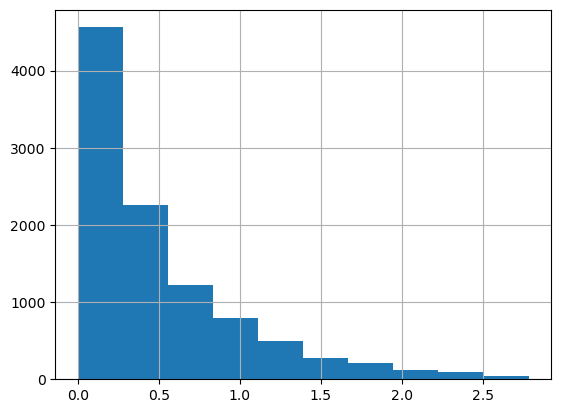

In [101]:
test_pos.pred_rating.hist();

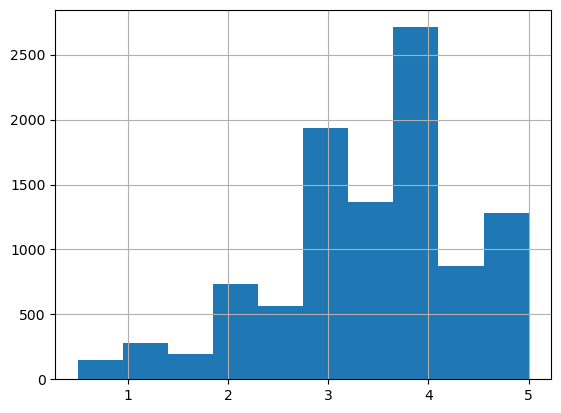

In [102]:
test_pos.true_rating.hist();

In [103]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_pos.true_rating, test_pos.pred_rating)

3.00644891379616

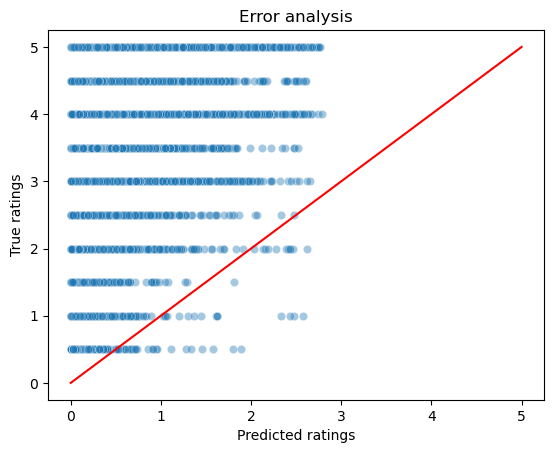

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

predictions = test_pos.pred_rating
true_values = test_pos.true_rating

plt.title('Error analysis')
plt.xlabel('Predicted ratings')
plt.ylabel('True ratings')
sns.lineplot(x=[0,5], y=[0,5], color='red')
sns.scatterplot(x=predictions, y=true_values, alpha=0.4)
plt.show()

In [106]:
test_pos.sort_values("pred_rating", ascending=False)

,row_pos,column_pos,true_rating,pred_rating
68612,446,314,4.0,2.784454
15541,101,314,5.0,2.766295
79868,497,314,5.0,2.750678
78240,484,314,5.0,2.743180
21876,141,314,4.0,2.739340
...,...,...,...,...
17079,107,4187,4.0,0.000000
16853,104,8795,5.0,0.000000
49818,317,8912,3.0,0.000000
52007,337,9711,1.0,0.000000


since the ratings allow 0.5 steps the overall assessment of the predictionquality needs to handle this, thus creating 10 different values for comparison

In [107]:
test_pos["double_rating"] = test_pos.true_rating * 2

In [108]:
pred_ratings = []
for x in range(1,11):
    pred_ratings.append(test_pos.loc[test_pos.double_rating==x,:]["pred_rating"].mean())

d = {"pred_ratings": pred_ratings, "true_values": list(range(1,11))}
pd.DataFrame(d)

,pred_ratings,true_values
0,0.279525,1
1,0.281632,2
2,0.241089,3
3,0.327161,4
4,0.331338,5
5,0.433872,6
6,0.422958,7
7,0.550966,8
8,0.617894,9
9,0.753945,10


Despite showing inconsistencies when predicitng ratings for movies which scored average ratings in reality, the DF above shows clearly, that the movies with a real rating of 4 and higher score the highest average predictions. Since the recommender is intended to suggest to top entries of the movie database, this result seems to be "good enough" in order to use the user based collaborative filter as well.